In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\Zomato.csv")
df.head()

,order_id,order_datetime,customer_id,customer_name,customer_email,customer_phone,city,area,restaurant_id,restaurant_name,...,delivery_partner_id,delivery_partner_name,promised_time_min,actual_delivery_time_min,order_status,rating,feedback,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,O100153,"Apr 21, 2025 16:48",C1386,Krishna Verma,krishna.verma@yahoo.com,9951192192,Bengaluru,Koramangala,R005,Pizza Point,...,D005,Amit J,30,41.0,Delivered,3.0,very late,NaN,NaN,NaN
1,O100140,04-05-2025 17:12,C1410,Muhammad Gupta,muhammad.gupta@gmail.com,9609040044,Jaipur,C-Scheme,R001,Spice-Hub,...,D008,Rahul N,32,NaN,Returned,NaN,wrong item,NaN,NaN,NaN
2,O102651,"Apr 17, 2025 21:37",C1452,Vihaan Gupta,vihaan.gupta@hotmail.com,9142228344,Jaipur,Vaishali Nagar,R005,Pizza Point,...,D001,Ravi K,32,NaN,Delivered,4.5,excellent,NaN,NaN,NaN
3,O103391,20 Jun 2025 06:06 PM,C1216,Ananya Iyer,NaN,968-436-8198,BENGALURU,KORAMANGALA,R002,GreenBowl,...,D004,Rakesh S,50,NaN,Cancelled,NaN,cold food,NaN,NaN,NaN
4,O102847,15-07-2025,C1061,Muhammad Patel,muhammad.patel@yahoo.com,(+91) 90571-81039,hyderabad,Ameerpet,R003,URBANTADKA,...,D003,Imran H,32,35.0,Delivered,NaN,average,NaN,NaN,NaN


In [4]:
df.describe()

,quantity,item_price,discount_amount,total_amount,promised_time_min,actual_delivery_time_min,rating,Unnamed: 25,Unnamed: 26,Unnamed: 27
count,1080.000000,1080.000000,1080.000000,997.000000,1080.000000,698.000000,559.000000,0.0,0.0,0.0
mean,1.337963,330.879269,8.583333,438.189549,39.678704,48.912607,3.343470,NaN,NaN,NaN
std,0.521674,122.863156,13.767987,246.905944,8.780798,19.665702,1.339404,NaN,NaN,NaN
min,1.000000,120.690000,0.000000,90.070000,25.000000,5.000000,1.000000,NaN,NaN,NaN
25%,1.000000,219.667500,0.000000,254.250000,32.000000,36.000000,2.000000,NaN,NaN,NaN
50%,1.000000,330.055000,0.000000,386.610000,40.000000,50.000000,3.500000,NaN,NaN,NaN
75%,2.000000,435.077500,20.000000,522.820000,47.000000,63.000000,4.500000,NaN,NaN,NaN
max,3.000000,548.420000,50.000000,1563.720000,54.000000,91.000000,5.000000,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  1080 non-null   object 
 1   order_datetime            1080 non-null   object 
 2   customer_id               1080 non-null   object 
 3   customer_name             1080 non-null   object 
 4   customer_email            1031 non-null   object 
 5   customer_phone            1044 non-null   object 
 6   city                      1080 non-null   object 
 7   area                      1080 non-null   object 
 8   restaurant_id             1080 non-null   object 
 9   restaurant_name           1080 non-null   object 
 10  cuisine                   1080 non-null   object 
 11  item_name                 1080 non-null   object 
 12  item_category             1080 non-null   object 
 13  quantity                  1080 non-null   int64  
 14  item_pri

In [8]:
df['order_datetime'] = pd.to_datetime(df['order_datetime'], format='mixed', dayfirst=True)


In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  1080 non-null   object        
 1   order_datetime            1080 non-null   datetime64[ns]
 2   customer_id               1080 non-null   object        
 3   customer_name             1080 non-null   object        
 4   customer_email            1031 non-null   object        
 5   customer_phone            1044 non-null   object        
 6   city                      1080 non-null   object        
 7   area                      1080 non-null   object        
 8   restaurant_id             1080 non-null   object        
 9   restaurant_name           1080 non-null   object        
 10  cuisine                   1080 non-null   object        
 11  item_name                 1080 non-null   object        
 12  item_category       

,order_id,order_datetime,customer_id,customer_name,customer_email,customer_phone,city,area,restaurant_id,restaurant_name,...,delivery_partner_id,delivery_partner_name,promised_time_min,actual_delivery_time_min,order_status,rating,feedback,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,O100153,2025-04-21 16:48:00,C1386,Krishna Verma,krishna.verma@yahoo.com,9951192192,Bengaluru,Koramangala,R005,Pizza Point,...,D005,Amit J,30,41.0,Delivered,3.0,very late,NaN,NaN,NaN
1,O100140,2025-05-04 17:12:00,C1410,Muhammad Gupta,muhammad.gupta@gmail.com,9609040044,Jaipur,C-Scheme,R001,Spice-Hub,...,D008,Rahul N,32,NaN,Returned,NaN,wrong item,NaN,NaN,NaN
2,O102651,2025-04-17 21:37:00,C1452,Vihaan Gupta,vihaan.gupta@hotmail.com,9142228344,Jaipur,Vaishali Nagar,R005,Pizza Point,...,D001,Ravi K,32,NaN,Delivered,4.5,excellent,NaN,NaN,NaN
3,O103391,2025-06-20 18:06:00,C1216,Ananya Iyer,NaN,968-436-8198,BENGALURU,KORAMANGALA,R002,GreenBowl,...,D004,Rakesh S,50,NaN,Cancelled,NaN,cold food,NaN,NaN,NaN
4,O102847,2025-07-15 00:00:00,C1061,Muhammad Patel,muhammad.patel@yahoo.com,(+91) 90571-81039,hyderabad,Ameerpet,R003,URBANTADKA,...,D003,Imran H,32,35.0,Delivered,NaN,average,NaN,NaN,NaN


In [10]:
df['Order_Month'] = df['order_datetime'] .dt.month
df['Order_Year'] = df['order_datetime']. dt.year
df['Order_Day'] = df['order_datetime'].dt.day

In [11]:
df.head()

,order_id,order_datetime,customer_id,customer_name,customer_email,customer_phone,city,area,restaurant_id,restaurant_name,...,actual_delivery_time_min,order_status,rating,feedback,Unnamed: 25,Unnamed: 26,Unnamed: 27,Order_Month,Order_Year,Order_Day
0,O100153,2025-04-21 16:48:00,C1386,Krishna Verma,krishna.verma@yahoo.com,9951192192,Bengaluru,Koramangala,R005,Pizza Point,...,41.0,Delivered,3.0,very late,NaN,NaN,NaN,4,2025,21
1,O100140,2025-05-04 17:12:00,C1410,Muhammad Gupta,muhammad.gupta@gmail.com,9609040044,Jaipur,C-Scheme,R001,Spice-Hub,...,NaN,Returned,NaN,wrong item,NaN,NaN,NaN,5,2025,4
2,O102651,2025-04-17 21:37:00,C1452,Vihaan Gupta,vihaan.gupta@hotmail.com,9142228344,Jaipur,Vaishali Nagar,R005,Pizza Point,...,NaN,Delivered,4.5,excellent,NaN,NaN,NaN,4,2025,17
3,O103391,2025-06-20 18:06:00,C1216,Ananya Iyer,NaN,968-436-8198,BENGALURU,KORAMANGALA,R002,GreenBowl,...,NaN,Cancelled,NaN,cold food,NaN,NaN,NaN,6,2025,20
4,O102847,2025-07-15 00:00:00,C1061,Muhammad Patel,muhammad.patel@yahoo.com,(+91) 90571-81039,hyderabad,Ameerpet,R003,URBANTADKA,...,35.0,Delivered,NaN,average,NaN,NaN,NaN,7,2025,15


In [12]:
df.isnull().sum()

order_id                       0
order_datetime                 0
customer_id                    0
customer_name                  0
customer_email                49
customer_phone                36
city                           0
area                           0
restaurant_id                  0
restaurant_name                0
cuisine                        0
item_name                      0
item_category                  0
quantity                       0
item_price                     0
discount_amount                0
total_amount                  83
payment_method               194
delivery_partner_id            0
delivery_partner_name          0
promised_time_min              0
actual_delivery_time_min     382
order_status                   0
rating                       521
feedback                     214
Unnamed: 25                 1080
Unnamed: 26                 1080
Unnamed: 27                 1080
Order_Month                    0
Order_Year                     0
Order_Day 

In [17]:
df = df.dropna(subset=['customer_email'])
   

In [18]:
df = df.dropna(subset=['customer_phone'])

In [19]:
df.isnull().sum()

order_id                      0
order_datetime                0
customer_id                   0
customer_name                 0
customer_email                0
customer_phone                0
city                          0
area                          0
restaurant_id                 0
restaurant_name               0
cuisine                       0
item_name                     0
item_category                 0
quantity                      0
item_price                    0
discount_amount               0
total_amount                 78
payment_method              183
delivery_partner_id           0
delivery_partner_name         0
promised_time_min             0
actual_delivery_time_min    351
order_status                  0
rating                      486
feedback                    195
Unnamed: 25                 998
Unnamed: 26                 998
Unnamed: 27                 998
Order_Month                   0
Order_Year                    0
Order_Day                     0
dtype: i

In [20]:
df['payment_method'].fillna('Unknown', inplace=True)


In [22]:
df.isnull().sum()

order_id                      0
order_datetime                0
customer_id                   0
customer_name                 0
customer_email                0
customer_phone                0
city                          0
area                          0
restaurant_id                 0
restaurant_name               0
cuisine                       0
item_name                     0
item_category                 0
quantity                      0
item_price                    0
discount_amount               0
total_amount                 78
payment_method                0
delivery_partner_id           0
delivery_partner_name         0
promised_time_min             0
actual_delivery_time_min    351
order_status                  0
rating                      486
feedback                    195
Unnamed: 25                 998
Unnamed: 26                 998
Unnamed: 27                 998
Order_Month                   0
Order_Year                    0
Order_Day                     0
dtype: i

In [24]:
df.duplicated().sum()
df[df.duplicated(keep=False)].sort_values(by=['order_id'])


,order_id,order_datetime,customer_id,customer_name,customer_email,customer_phone,city,area,restaurant_id,restaurant_name,...,actual_delivery_time_min,order_status,rating,feedback,Unnamed: 25,Unnamed: 26,Unnamed: 27,Order_Month,Order_Year,Order_Day


In [25]:
df.head()

,order_id,order_datetime,customer_id,customer_name,customer_email,customer_phone,city,area,restaurant_id,restaurant_name,...,actual_delivery_time_min,order_status,rating,feedback,Unnamed: 25,Unnamed: 26,Unnamed: 27,Order_Month,Order_Year,Order_Day
0,O100153,2025-04-21 16:48:00,C1386,Krishna Verma,krishna.verma@yahoo.com,9951192192,Bengaluru,Koramangala,R005,Pizza Point,...,41.0,Delivered,3.0,very late,NaN,NaN,NaN,4,2025,21
1,O100140,2025-05-04 17:12:00,C1410,Muhammad Gupta,muhammad.gupta@gmail.com,9609040044,Jaipur,C-Scheme,R001,Spice-Hub,...,NaN,Returned,NaN,wrong item,NaN,NaN,NaN,5,2025,4
2,O102651,2025-04-17 21:37:00,C1452,Vihaan Gupta,vihaan.gupta@hotmail.com,9142228344,Jaipur,Vaishali Nagar,R005,Pizza Point,...,NaN,Delivered,4.5,excellent,NaN,NaN,NaN,4,2025,17
4,O102847,2025-07-15 00:00:00,C1061,Muhammad Patel,muhammad.patel@yahoo.com,(+91) 90571-81039,hyderabad,Ameerpet,R003,URBANTADKA,...,35.0,Delivered,NaN,average,NaN,NaN,NaN,7,2025,15
5,O100418,2025-05-28 00:00:00,C1126,Arjun Kapoor,arjun.kapoor@yahoo.com,+91 97585 22164,Ahmedabad,Maninagar,R005,PIZZA-POINT,...,NaN,Cancelled,NaN,good,NaN,NaN,NaN,5,2025,28


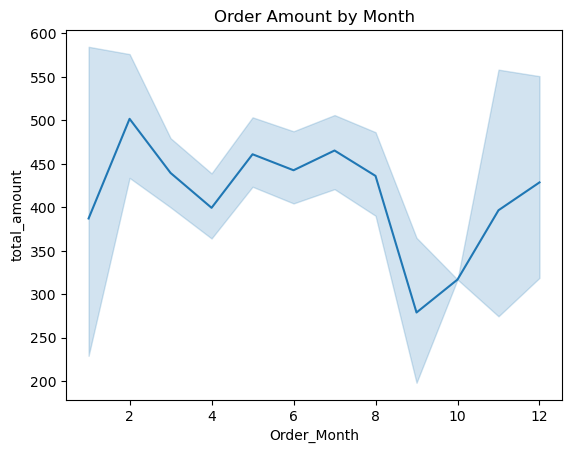

In [28]:
sns.lineplot(x='Order_Month', y='total_amount', data=df)
plt.title('Order Amount by Month')
plt.show()

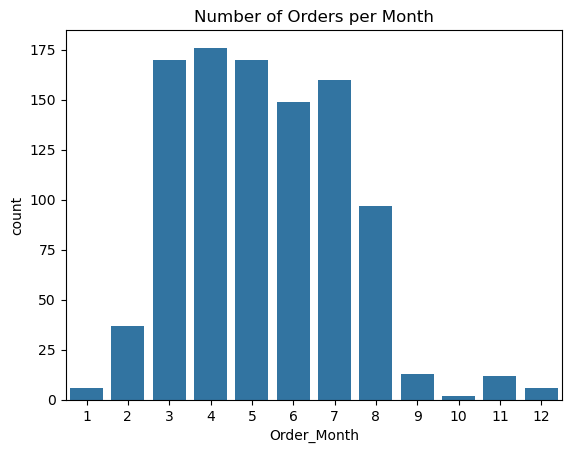

In [33]:
sns.countplot(x='Order_Month', data=df)
plt.title('Number of Orders per Month') 
plt.show()